In [2]:
import pandas as pd
import numpy as np
from skrebate import ReliefF
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline



data = pd.read_excel("D:\datasss\SpecIndexdata.xlsx")
data[:5]

file name   label  encoded_labels   Index_1   Index_2  \
0  D:\datass\Active\Q-S1-15.hdr  Active               0  1.495394  1.749377   
1  D:\datass\Active\Q-S1-16.hdr  Active               0  1.716258  1.983687   
2  D:\datass\Active\Q-S1-17.hdr  Active               0  1.373793  1.631114   
3   D:\datass\Active\Q-S1-2.hdr  Active               0  1.499100  1.690066   
4  D:\datass\Active\Q-S1-23.hdr  Active               0  1.323381  1.524874   

    Index_3   Index_4   Index_5   Index_6   Index_7  ...  Index_41  Index_42  \
0  1.762044  0.904506  2.014863  2.758257 -0.093119  ...  0.147356  0.432710   
1  1.772468  0.878709  2.229741  3.140101 -0.092107  ...  0.154695  0.466491   
2  1.834220  0.906036  1.702742  2.637215 -0.094318  ...  0.188630  0.416053   
3  1.567968  0.914473  1.525317  2.550286 -0.086786  ...  0.062799  0.394892   
4  1.717447  0.915440  1.758554  2.416757 -0.090583  ...  0.138383  0.359924   

   Index_43  Index_44  Index_45  Index_46  Index_47  Index_48  Index_49  \
0  0.208933 -0.312325  0.230979  0.207997  0.309550  1.981386  1.271761   
1  0.257043 -0.301080  0.276669  0.257629  0.363971  2.333080  1.278898   
2  0.170949 -0.331029  0.193263  0.179747  0.333184  1.797626  0.712840   
3  0.231454 -0.253053  0.237754  0.145797  0.445423  1.757065  1.393883   
4  0.140125 -0.299888  0.153409  0.123755  0.236459  1.676131  0.658985   

   Index_50  
0  0.602077  
1  0.611031  
2  0.609577  
3  0.550013  
4  0.594385  

[5 rows x 53 columns]

In [3]:

print("打乱前的数据：")
print(data.head())


seed = 1234


data_s = data.sample(frac=1, random_state=seed).reset_index(drop=True)


print("\n打乱后的数据：")
print(data_s.head())



打乱前的数据：
                      file name   label  encoded_labels   Index_1   Index_2  \
0  D:\datass\Active\Q-S1-15.hdr  Active               0  1.495394  1.749377   
1  D:\datass\Active\Q-S1-16.hdr  Active               0  1.716258  1.983687   
2  D:\datass\Active\Q-S1-17.hdr  Active               0  1.373793  1.631114   
3   D:\datass\Active\Q-S1-2.hdr  Active               0  1.499100  1.690066   
4  D:\datass\Active\Q-S1-23.hdr  Active               0  1.323381  1.524874   

    Index_3   Index_4   Index_5   Index_6   Index_7  ...  Index_41  Index_42  \
0  1.762044  0.904506  2.014863  2.758257 -0.093119  ...  0.147356  0.432710   
1  1.772468  0.878709  2.229741  3.140101 -0.092107  ...  0.154695  0.466491   
2  1.834220  0.906036  1.702742  2.637215 -0.094318  ...  0.188630  0.416053   
3  1.567968  0.914473  1.525317  2.550286 -0.086786  ...  0.062799  0.394892   
4  1.717447  0.915440  1.758554  2.416757 -0.090583  ...  0.138383  0.359924   

   Index_43  Index_44  Index_45  Ind

In [4]:
# m * n 
print("数据矩阵 data.shape：",data_s.shape)


features = data_s.iloc[:, 3:].values
labels = data_s.iloc[:, 2].values

print(f"X.shape:{features.shape}, y.shape:{labels.shape}")

数据矩阵 data.shape： (206, 53)
X.shape:(206, 50), y.shape:(206,)


In [6]:
from sklearn.model_selection import train_test_split


fs = ReliefF()
fs.fit(features, labels)

for feature_name, feature_score in zip(data_s.drop(['file name','label', 'encoded_labels'], axis=1).columns,
                                       fs.feature_importances_):
    print(feature_name, '\t', feature_score)

Index_1 	 0.20651454749087295
Index_2 	 0.2020503909620897
Index_3 	 0.2767192727111129
Index_4 	 0.3481180930996033
Index_5 	 0.03632349414798797
Index_6 	 0.22389082372599373
Index_7 	 0.07942575214225799
Index_8 	 0.2889403749917178
Index_9 	 0.09429048225662776
Index_10 	 0.2947933547366684
Index_11 	 0.11828853303349363
Index_12 	 0.3072696798123748
Index_13 	 0.25718281874450233
Index_14 	 0.06861044437266373
Index_15 	 0.023350572468205752
Index_16 	 0.26673225208008045
Index_17 	 0.018628845216042803
Index_18 	 0.34188803884666835
Index_19 	 0.2812987473547983
Index_20 	 0.2705669273214269
Index_21 	 0.2815387904659031
Index_22 	 0.249910445582446
Index_23 	 0.03483212538844357
Index_24 	 0.06658611861091972
Index_25 	 0.21842844647021034
Index_26 	 0.2569258689273765
Index_27 	 0.06765969719175467
Index_28 	 0.2992944892187058
Index_29 	 0.21695007104755187
Index_30 	 0.02089173872421427
Index_31 	 0.23606550510278979
Index_32 	 0.0922036526519138
Index_33 	 0.2822588806706264

In [10]:

dataIMp = {
    "Index_1": 0.20651454749087295,
    "Index_2": 0.2020503909620897,
    "Index_3": 0.2767192727111129,
    "Index_4": 0.3481180930996033,
    "Index_5": 0.03632349414798797,
    "Index_6": 0.22389082372599373,
    "Index_7": 0.07942575214225799,
    "Index_8": 0.2889403749917178,
    "Index_9": 0.09429048225662776,
    "Index_10": 0.2947933547366684,
    "Index_11": 0.11828853303349363,
    "Index_12": 0.3072696798123748,
    "Index_13": 0.25718281874450233,
    "Index_14": 0.06861044437266373,
    "Index_15": 0.023350572468205752,
    "Index_16": 0.26673225208008045,
    "Index_17": 0.018628845216042803,
    "Index_18": 0.34188803884666835,
    "Index_19": 0.2812987473547983,
    "Index_20": 0.2705669273214269,
    "Index_21": 0.2815387904659031,
    "Index_22": 0.249910445582446,
    "Index_23": 0.03483212538844357,
    "Index_24": 0.06658611861091972,
    "Index_25": 0.21842844647021034,
    "Index_26": 0.2569258689273765,
    "Index_27": 0.06765969719175467,
    "Index_28": 0.2992944892187058,
    "Index_29": 0.21695007104755187,
    "Index_30": 0.02089173872421427,
    "Index_31": 0.23606550510278979,
    "Index_32": 0.0922036526519138,
    "Index_33": 0.28225888067062643,
    "Index_34": 0.22984668146504522,
    "Index_35": 0.21482660454972052,
    "Index_36": 0.035504342843544964,
    "Index_37": 0.03995775093219892,
    "Index_38": 0.14832589342616767,
    "Index_39": 0.05962847767591615,
    "Index_40": 0.004111373371249759,
    "Index_41": 0.028242140896805757,
    "Index_42": 0.181146743706575,
    "Index_43": 0.18868442218136333,
    "Index_44": 0.2889941023793883,
    "Index_45": 0.21635073259333623,
    "Index_46": 0.2355369736981716,
    "Index_47": 0.03223465692571702,
    "Index_48": 0.19566536338213147,
    "Index_49": 0.07394945083183878,
    "Index_50": 0.11700820298575695
}


df = pd.DataFrame(list(dataIMp.items()), columns=["Index", "Value"])


print(df)

       Index     Value
0    Index_1  0.206515
1    Index_2  0.202050
2    Index_3  0.276719
3    Index_4  0.348118
4    Index_5  0.036323
5    Index_6  0.223891
6    Index_7  0.079426
7    Index_8  0.288940
8    Index_9  0.094290
9   Index_10  0.294793
10  Index_11  0.118289
11  Index_12  0.307270
12  Index_13  0.257183
13  Index_14  0.068610
14  Index_15  0.023351
15  Index_16  0.266732
16  Index_17  0.018629
17  Index_18  0.341888
18  Index_19  0.281299
19  Index_20  0.270567
20  Index_21  0.281539
21  Index_22  0.249910
22  Index_23  0.034832
23  Index_24  0.066586
24  Index_25  0.218428
25  Index_26  0.256926
26  Index_27  0.067660
27  Index_28  0.299294
28  Index_29  0.216950
29  Index_30  0.020892
30  Index_31  0.236066
31  Index_32  0.092204
32  Index_33  0.282259
33  Index_34  0.229847
34  Index_35  0.214827
35  Index_36  0.035504
36  Index_37  0.039958
37  Index_38  0.148326
38  Index_39  0.059628
39  Index_40  0.004111
40  Index_41  0.028242
41  Index_42  0.181147
42  Index_4

In [34]:

df = df.sort_values(by="Value", ascending=False)

top_10 = df.head(10)

print(top_10)

       Index     Value
3    Index_4  0.348118
17  Index_18  0.341888
11  Index_12  0.307270
27  Index_28  0.299294
9   Index_10  0.294793
43  Index_44  0.288994
7    Index_8  0.288940
32  Index_33  0.282259
20  Index_21  0.281539
18  Index_19  0.281299


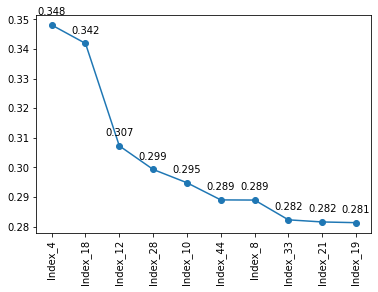

In [33]:
import matplotlib.pyplot as plt

df = df.sort_values(by="Value", ascending=False)


top_10 = df.head(10)


plt.plot(top_10["Index"], top_10["Value"], marker="o")


for i, point in top_10.iterrows():
    plt.annotate(f"{point['Value']:.3f}", (point['Index'], point['Value']), textcoords="offset points", xytext=(0,10), ha='center')


plt.xticks(rotation=90)


plt.show()

In [35]:

df = df.sort_values(by="Value", ascending=False)

top_15 = df.head(15)

print(top_15)

       Index     Value
3    Index_4  0.348118
17  Index_18  0.341888
11  Index_12  0.307270
27  Index_28  0.299294
9   Index_10  0.294793
43  Index_44  0.288994
7    Index_8  0.288940
32  Index_33  0.282259
20  Index_21  0.281539
18  Index_19  0.281299
2    Index_3  0.276719
19  Index_20  0.270567
15  Index_16  0.266732
12  Index_13  0.257183
25  Index_26  0.256926


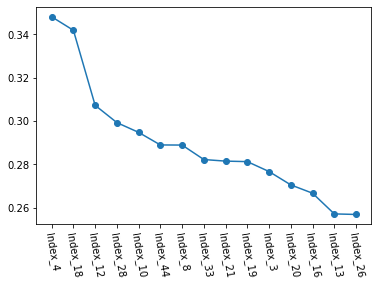

In [31]:
import matplotlib.pyplot as plt

df = df.sort_values(by="Value", ascending=False)


top_10 = df.head(15)


plt.plot(top_10["Index"], top_10["Value"], marker="o")


for i, point in top_10.iterrows():
    plt.annotate("", (point['Index'], point['Value']), textcoords="offset points", xytext=(0,15), ha='center')


plt.xticks(rotation=- 80)


plt.show()

In [37]:

df = df.sort_values(by="Value", ascending=False)

top_20 = df.head(20)

print(top_20)

       Index     Value
3    Index_4  0.348118
17  Index_18  0.341888
11  Index_12  0.307270
27  Index_28  0.299294
9   Index_10  0.294793
43  Index_44  0.288994
7    Index_8  0.288940
32  Index_33  0.282259
20  Index_21  0.281539
18  Index_19  0.281299
2    Index_3  0.276719
19  Index_20  0.270567
15  Index_16  0.266732
12  Index_13  0.257183
25  Index_26  0.256926
21  Index_22  0.249910
30  Index_31  0.236066
45  Index_46  0.235537
33  Index_34  0.229847
5    Index_6  0.223891


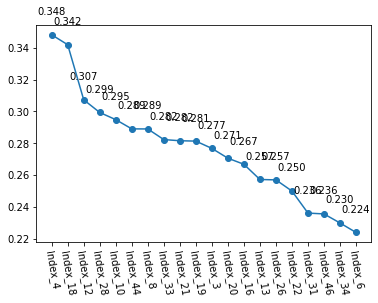

In [23]:
import matplotlib.pyplot as plt

df = df.sort_values(by="Value", ascending=False)


top_10 = df.head(20)


plt.plot(top_10["Index"], top_10["Value"], marker="o")


for i, point in top_10.iterrows():
    plt.annotate(f"{point['Value']:.3f}", (point['Index'], point['Value']), textcoords="offset points", xytext=(0,20), ha='center')


plt.xticks(rotation=- 80)


plt.show()

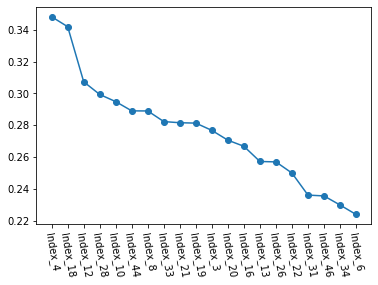

In [30]:
import matplotlib.pyplot as plt

df = df.sort_values(by="Value", ascending=False)


top_10 = df.head(20)


plt.plot(top_10["Index"], top_10["Value"], marker="o")


for i, point in top_10.iterrows():
    plt.annotate("", (point['Index'], point['Value']), textcoords="offset points", xytext=(0,20), ha='center')


plt.xticks(rotation=- 80)


plt.show()